***IMPORTING LIBRARIES***

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

***IMPORTING DATAS***

In [5]:
df =pd.read_csv('/Users/sandhiyamurugan/water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# Exploratory Data Analysis

***DATA INFORMATIONS***

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [12]:
df.shape

(3276, 10)

In [14]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [16]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

# CHECKING FOR OUTLIERS

**Box plot**

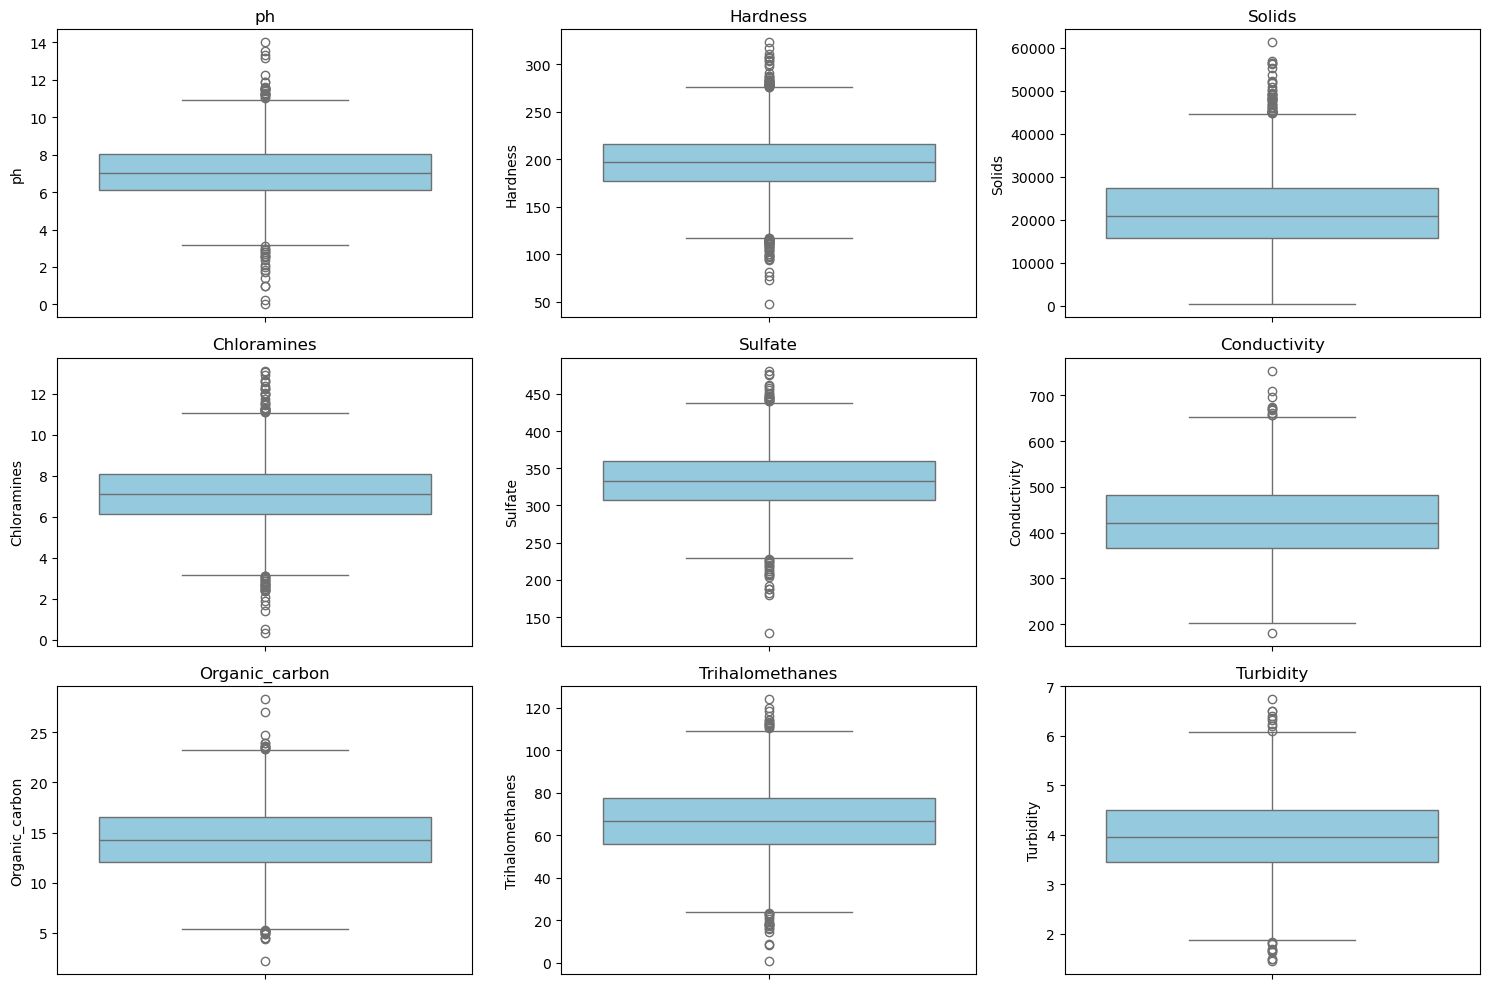

In [20]:
plt.figure(figsize=(15, 10))

# Looping through each column and plot boxplots
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[column], color='skyblue')
    plt.title(column)

plt.tight_layout()
plt.show()

***DATA VISUALIZATION***

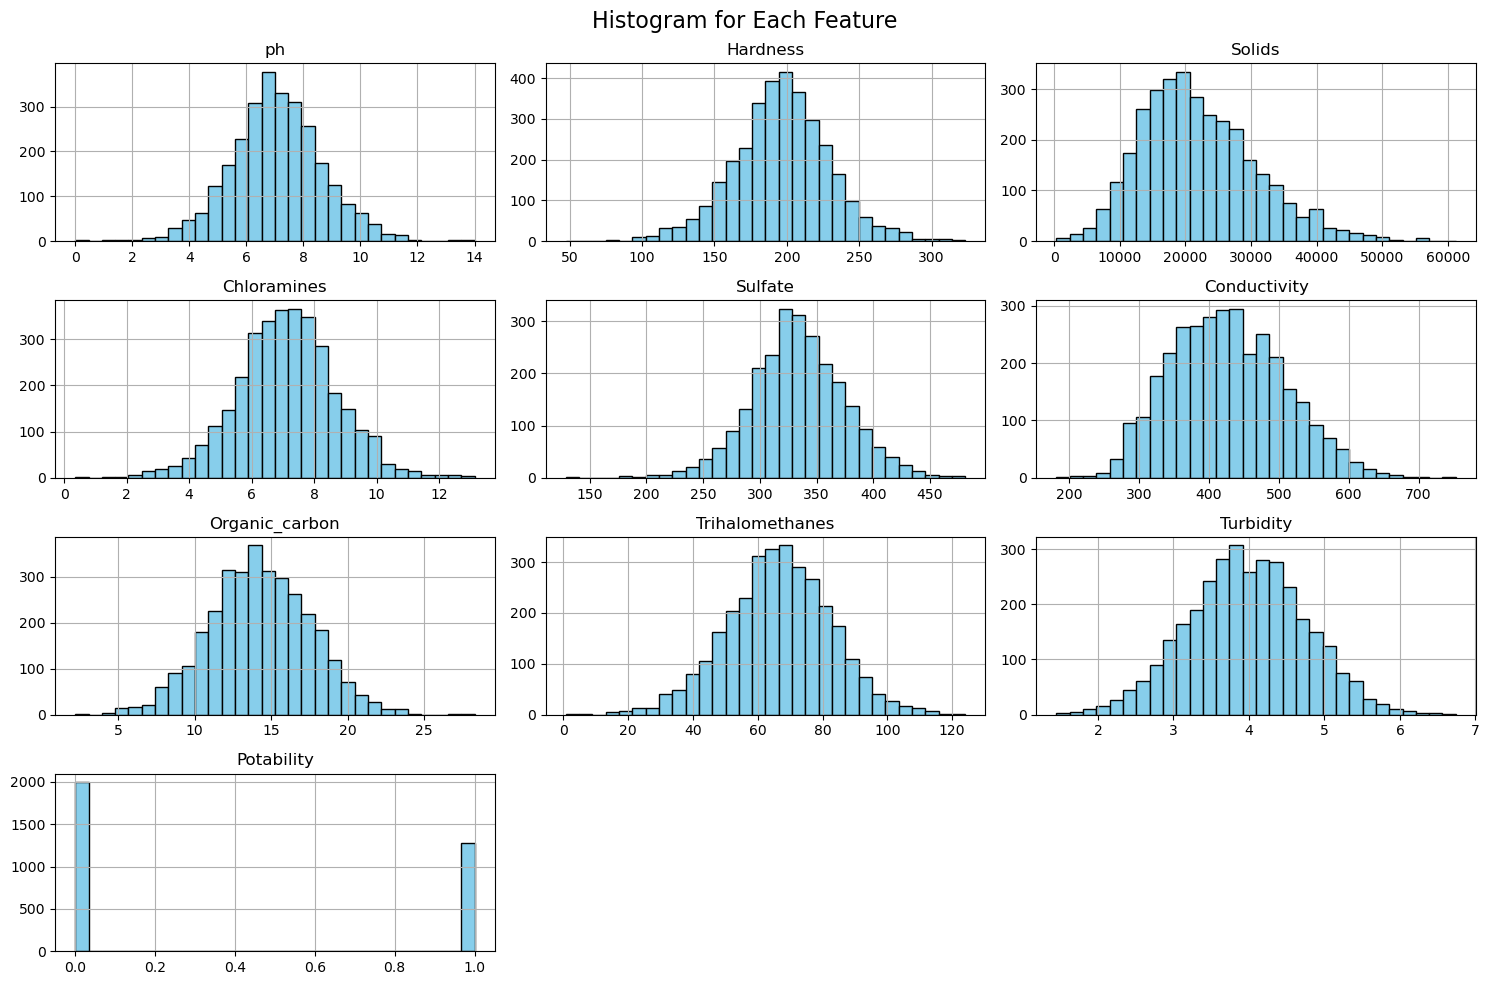

In [23]:
df.hist(bins=30, figsize=(15, 10), color='SkyBlue', edgecolor='black')
plt.suptitle("Histogram for Each Feature", fontsize=16)
plt.tight_layout()
plt.show()


***DATA DISTRIBUTION***

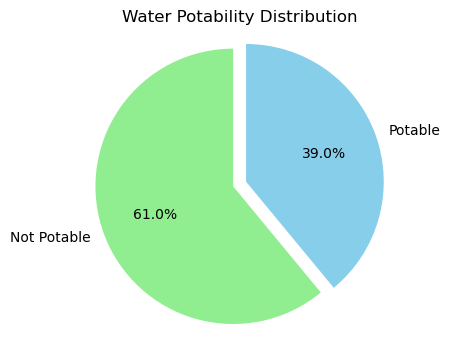

In [26]:
# Count values in 'Potability' column
labels = ['Not Potable', 'Potable']
sizes = df['Potability'].value_counts().sort_index()  # 0 first, then 1
colors = ['lightgreen', 'skyblue']

# Plot pie chart
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=(0, 0.1))
plt.title('Water Potability Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie is a circle.
plt.show()

***CORRELATION MATRIX***

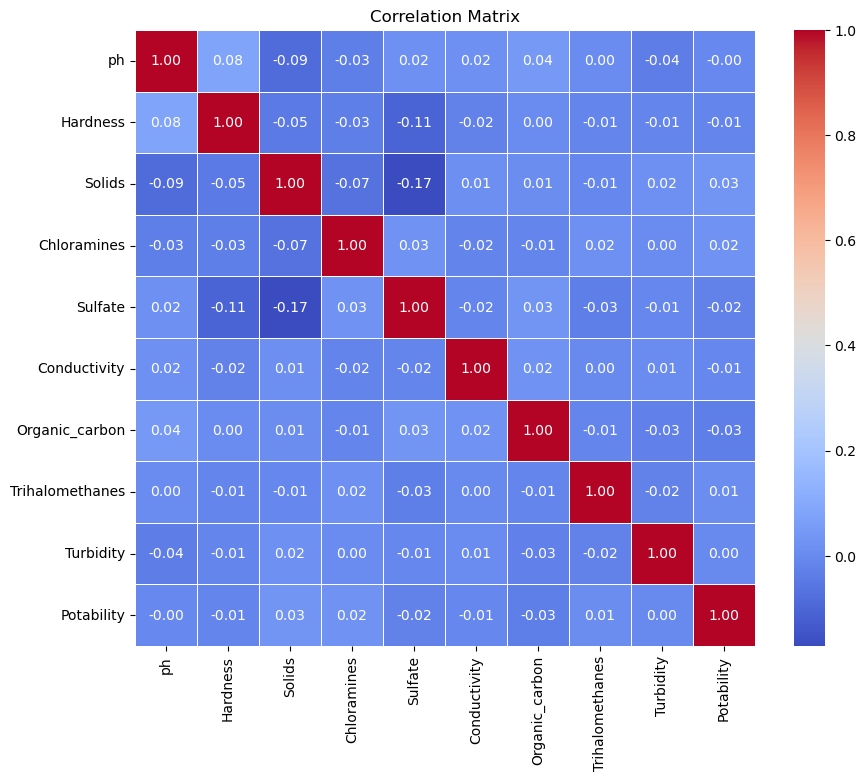

In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()



In [33]:
#Outlier Detection

In [35]:
def detect_outliers_iqr(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col} → Outliers Detected: {len(outliers)}")
    return outliers

outlier_cols = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']

for col in outlier_cols:
    detect_outliers_iqr(col)

ph → Outliers Detected: 46
Hardness → Outliers Detected: 83
Solids → Outliers Detected: 47
Chloramines → Outliers Detected: 61
Sulfate → Outliers Detected: 41
Conductivity → Outliers Detected: 11
Organic_carbon → Outliers Detected: 25
Trihalomethanes → Outliers Detected: 33
Turbidity → Outliers Detected: 19
Potability → Outliers Detected: 0


***OUTLIERS HAS BEEN TREATED WITH IQR***

In [38]:
def treat_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Cap values
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

    return df[col]

# Apply treatment to each outlier column (excluding 'Potability' as it's categorical)
for col in outlier_cols:
    if col != 'Potability':
        df[col] = treat_outliers_iqr(df, col)

print("Outliers have been treated using IQR-based capping.")


Outliers have been treated using IQR-based capping.


***CHECKING FOR NULLS***

In [41]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

#  HANDLING MISSING VALUES


***Missing values were imputed using group-specific means to preserve class-level distribution patterns.***

In [45]:
#ph has 491 missing values
#Sulfate has 781 missing values
#Trihalometanes has 162 missing values
df['ph'] = df['ph'].fillna(df.groupby(['Potability'])['ph'].transform('mean'))
df['Sulfate'] = df['Sulfate'].fillna(df.groupby(['Potability'])['Sulfate'].transform('mean'))
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df.groupby(['Potability'])['Trihalomethanes'].transform('mean'))

In [47]:
df.isnull().sum()


ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


# DATA PREPROCESSING

In [52]:
# Features and target
X = df.drop('Potability', axis=1)
y = df['Potability']



In [54]:
#splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)



In [56]:

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [58]:
#Apply Smote

#Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# MACHINE LEARNING MODELS


In [61]:
SVC

sklearn.svm._classes.SVC

Accuracy: 0.6173780487804879
AUC Score: 0.6467333984375
              precision    recall  f1-score   support

           0       0.69      0.68      0.68       400
           1       0.51      0.53      0.52       256

    accuracy                           0.62       656
   macro avg       0.60      0.60      0.60       656
weighted avg       0.62      0.62      0.62       656



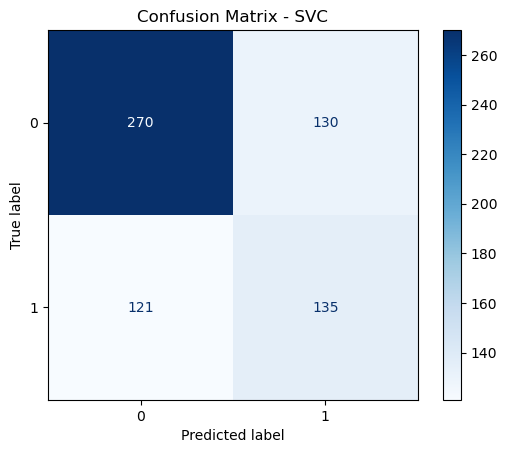

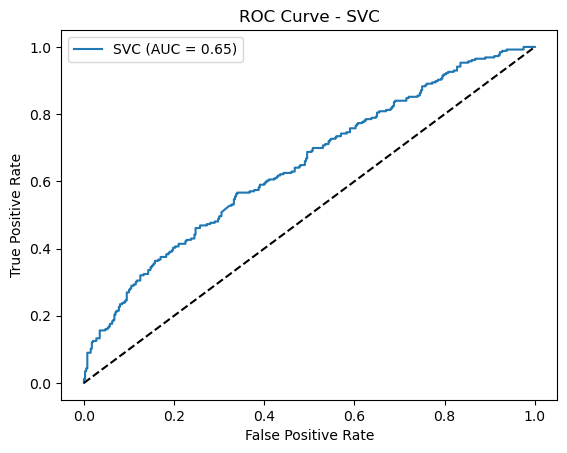

In [63]:

# Create SVC model (with probability=True to get probabilities for ROC)
svc_model = SVC(probability=True, random_state=42)
svc_model.fit(X_train_smote, y_train_smote)

# Predict
y_pred = svc_model.predict(X_test_scaled)
y_pred_proba = svc_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_pred_proba))  # Already correct
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - SVC")
plt.show()

y_pred_proba_svc = svc_model.predict_proba(X_test_scaled)[:, 1]


# Calculate ROC curve values for SVC
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, y_pred_proba_svc)

# Calculate AUC score for SVC
roc_svc = roc_auc_score(y_test, y_pred_proba_svc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr_svc, tpr_svc, label=f"SVC (AUC = {roc_svc:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVC")
plt.legend()
plt.show()


******SVC with GridSearchCV******

In [66]:
svc = SVC(probability=True, random_state=42)

param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.6036585365853658
ROC AUC Score: 0.640087890625
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.67      0.67       400
           1       0.49      0.50      0.49       256

    accuracy                           0.60       656
   macro avg       0.58      0.58      0.58       656
weighted avg       0.60      0.60      0.60       656



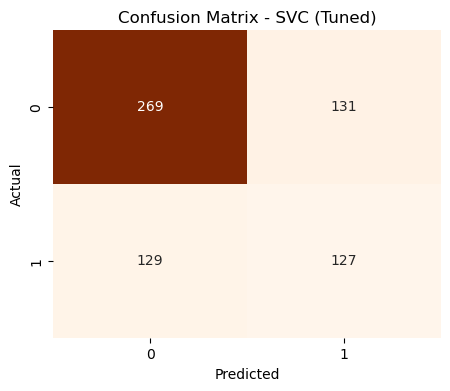

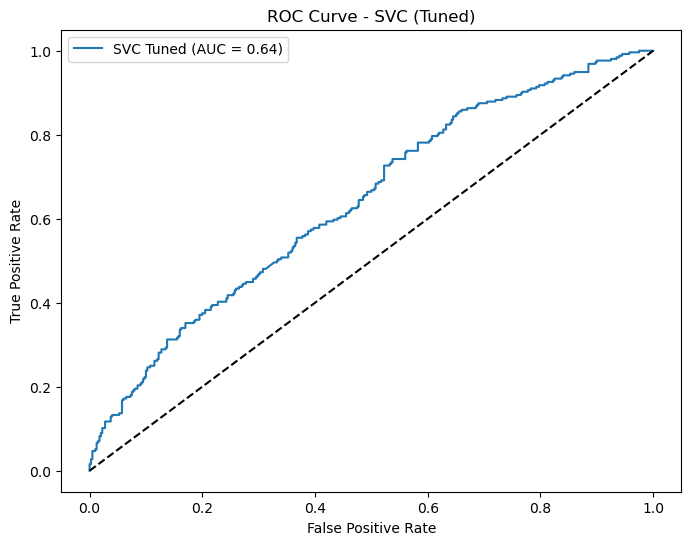

In [68]:
grid_svc = GridSearchCV(
    estimator=svc,
    param_grid=param_grid_svc,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_svc.fit(X_train_smote, y_train_smote)
svc_best = grid_svc.best_estimator_
# Predict
y_pred_svc_tuned = svc_best.predict(X_test_scaled)
y_proba_svc_tuned = svc_best.predict_proba(X_test_scaled)[:, 1]

# Evaluate

acc_svc_tuned = accuracy_score(y_test, y_pred_svc_tuned)
roc_svc_tuned = roc_auc_score(y_test, y_proba_svc_tuned)
report_svc_tuned = classification_report(y_test, y_pred_svc_tuned)
cm_svc_tuned = confusion_matrix(y_test, y_pred_svc_tuned)

print("Best Parameters:", grid_svc.best_params_)
print("Accuracy:", acc_svc_tuned)
print("ROC AUC Score:", roc_svc_tuned)
print("Classification Report:\n", report_svc_tuned)
plt.figure(figsize=(5,4))
sns.heatmap(cm_svc_tuned, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title('Confusion Matrix - SVC (Tuned)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_proba_svc_tuned)

plt.figure(figsize=(8,6))
plt.plot(fpr_svc, tpr_svc, label=f"SVC Tuned (AUC = {roc_svc_tuned:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVC (Tuned)")
plt.legend()
plt.show()

***Decision Tree***


In [71]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_smote, y_train_smote)


DecisionTreeClassifier(random_state=42)

Accuracy: 0.7317073170731707
AUC Score: 0.7265625
              precision    recall  f1-score   support

           0       0.80      0.75      0.77       400
           1       0.64      0.70      0.67       256

    accuracy                           0.73       656
   macro avg       0.72      0.73      0.72       656
weighted avg       0.74      0.73      0.73       656

ROC AUC Score: 0.7265625


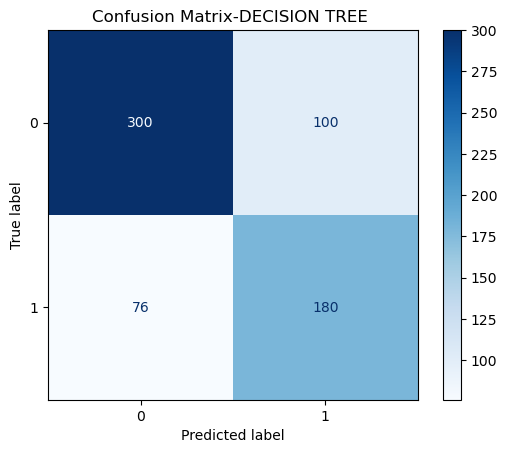

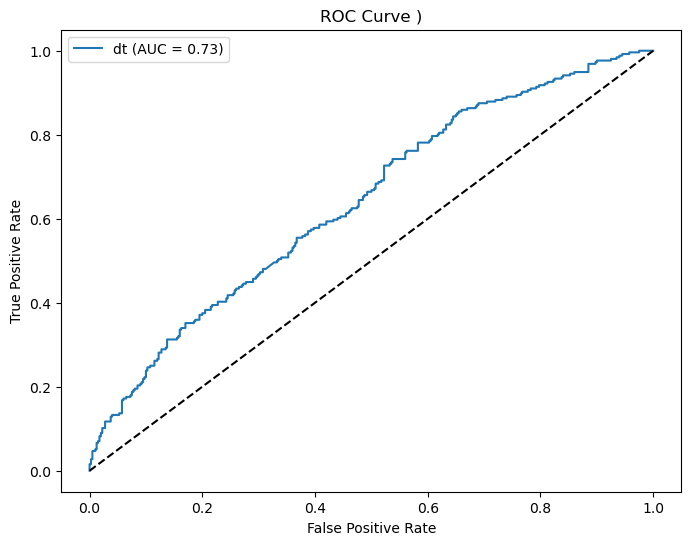

In [131]:
# Train Decision Tree on SMOTE + Scaled data
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_smote, y_train_smote)

# Predict
y_pred = dt_model.predict(X_test_scaled)
y_pred_proba = dt_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_pred_proba))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)


# ROC AUC Score
y_proba_dt = dt_model.predict_proba(X_test_scaled)[:, 1]
auc_dt = roc_auc_score(y_test, y_proba_dt)
print("ROC AUC Score:", auc_dt)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix-DECISION TREE ")
plt.show()

# Predict probabilities
y_pred_proba_dt = dt_model.predict_proba(X_test_scaled)[:, 1]

# ROC Curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_proba_dt)
#Then, update your plot line to:

plt.figure(figsize=(8,6))
plt.plot(fpr_svc, tpr_svc, label=f"dt (AUC = {roc_auc_dt:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve )")
plt.legend()
plt.show()

****Feature Importance****

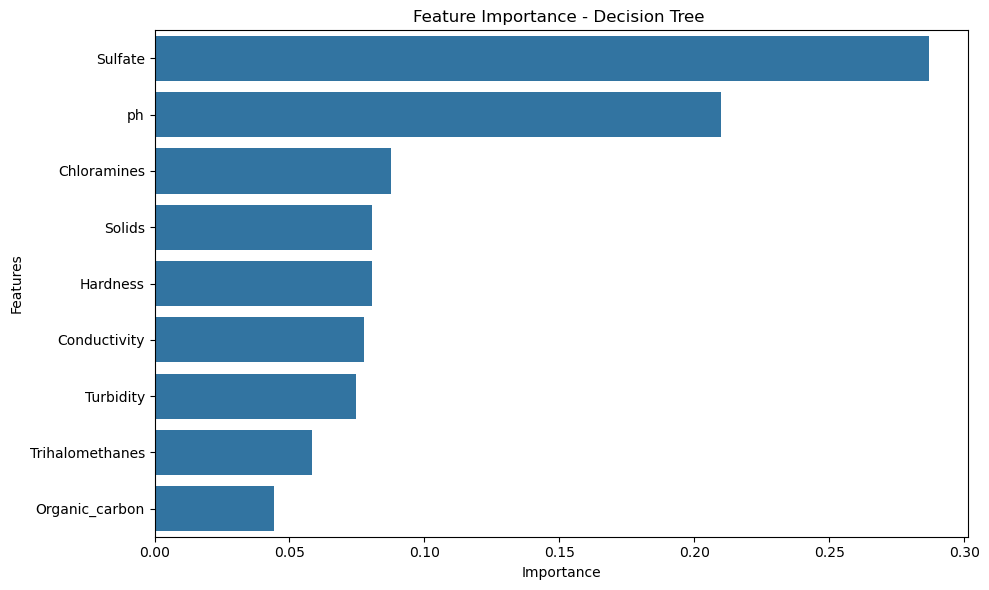

In [76]:
importances = dt_model.feature_importances_

# Assuming X_train_scaled was used for training but feature names are in X.columns
feature_names = X.columns

# Create dataframe
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance - Decision Tree ')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

****Decision Tree with GRIDSEARCHCV****

In [79]:
# Define hyperparameter grid
param_grid_dt = {
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Create model
dt_model = DecisionTreeClassifier()

# Create GridSearchCV
grid_dt = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit on training data
grid_dt.fit(X_train_scaled, y_train)

# Best parameters
print("Best Parameters for Decision Tree:")
print(grid_dt.best_params_)

# Use best estimator
best_dt_model = grid_dt.best_estimator_

# Predict
y_pred_dt = best_dt_model.predict(X_test_scaled)
y_proba_dt = best_dt_model.predict_proba(X_test_scaled)[:, 1]


Best Parameters for Decision Tree:
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5}


Accuracy: 0.7454268292682927
AUC Score: 0.8236376953125
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       400
           1       0.69      0.63      0.66       256

    accuracy                           0.75       656
   macro avg       0.73      0.72      0.73       656
weighted avg       0.74      0.75      0.74       656



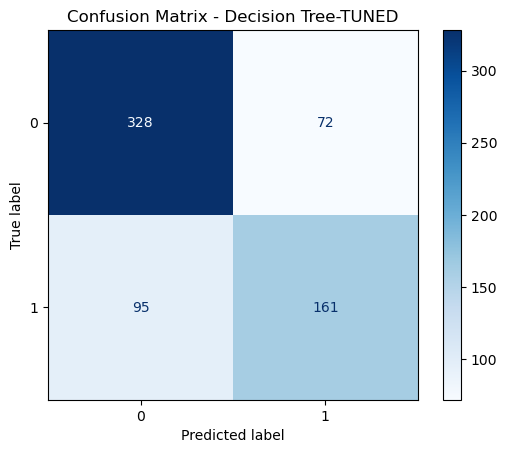

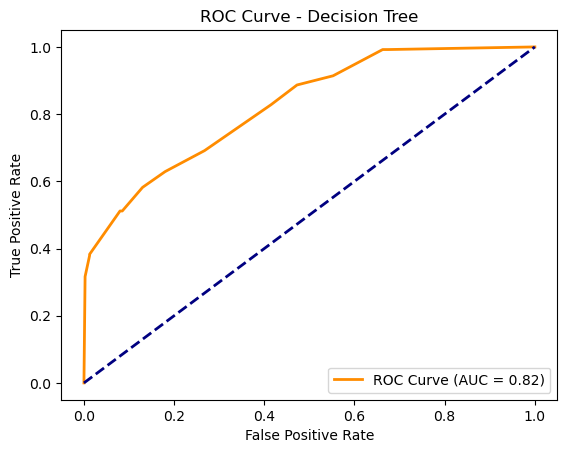

In [80]:
# Predict with Decision Tree
y_pred_dt = best_dt_model.predict(X_test_scaled)
y_proba_dt = best_dt_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("AUC Score:", roc_auc_score(y_test, y_proba_dt))
print(classification_report(y_test, y_pred_dt))
cm = confusion_matrix(y_test, y_pred_dt)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_dt_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Decision Tree-TUNED")
plt.show()

# ROC Curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_proba_dt)
roc_auc_dt = metrics.auc(fpr_dt, tpr_dt)

plt.figure()
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()


***FEATURE IMPORTANCE***

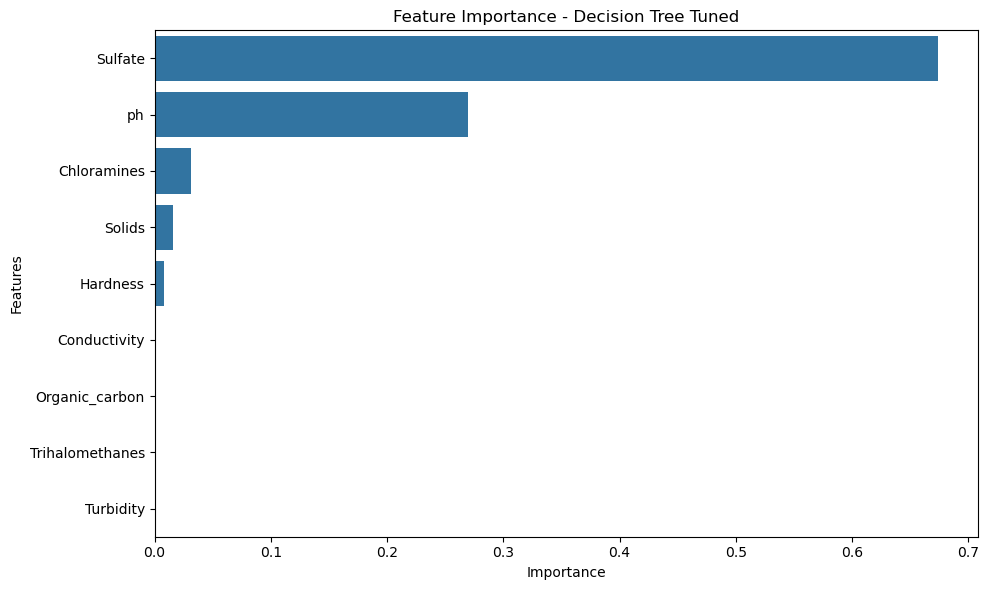

In [84]:
importances = best_dt_model.feature_importances_

# Assuming X_train_scaled was used for training but feature names are in X.columns
feature_names = X.columns

# Create dataframe
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance - Decision Tree Tuned')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

***Random Forest***

In [87]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       400
           1       0.70      0.71      0.70       256

    accuracy                           0.77       656
   macro avg       0.75      0.75      0.75       656
weighted avg       0.77      0.77      0.77       656

Accuracy: 0.7652439024390244
AUC Score: 0.754765625
ROC AUC Score: 0.8679882812499999


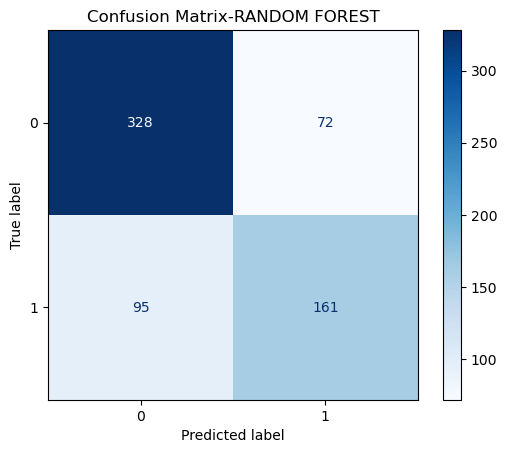

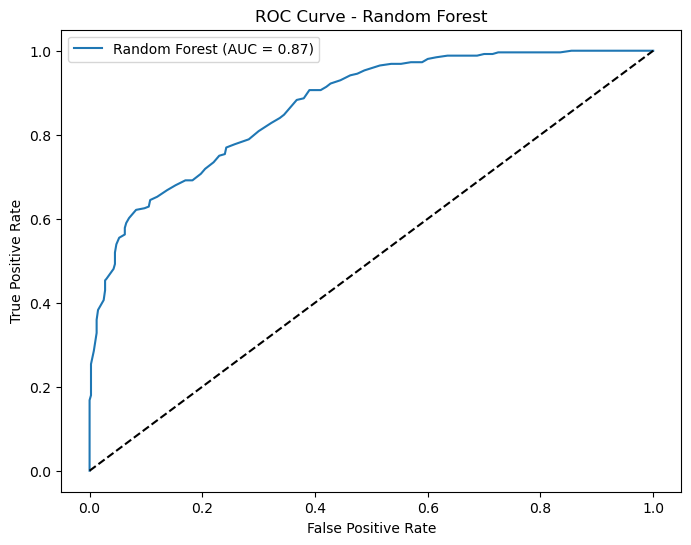

In [89]:
# Predict
y_pred_rf = rf_model.predict(X_test_scaled)

# After predicting probabilities
y_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Classification Report
cr_rf = classification_report(y_test, y_pred_rf)
print("Classification Report (Random Forest):")
print(cr_rf)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("AUC Score:", roc_auc_score(y_test, y_pred_rf))

# ROC AUC Score
y_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]
auc_rf = roc_auc_score(y_test, y_proba_rf)
print("ROC AUC Score:", auc_rf)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix-RANDOM FOREST")
plt.show()


# ROC Curve
y_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_proba_rf)
roc_auc_rf = metrics.auc(fpr_rf, tpr_rf)


# Plot ROC Curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, label="Random Forest (AUC = {:.2f})".format(auc_rf))
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

***Feature Importance***

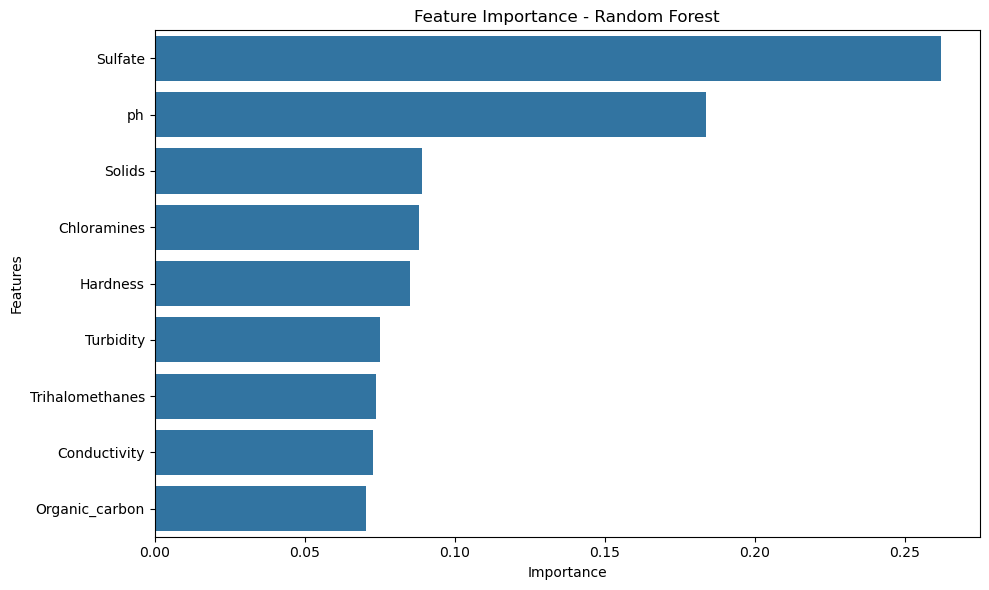

In [92]:
importances = rf_model.feature_importances_

# Assuming X_train_scaled was used for training but feature names are in X.columns
feature_names = X.columns

# Create dataframe
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

***Random Forest With GridSearchCV***

Best Parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy: 0.7789634146341463
AUC Score: 0.6071240234374999
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       400
           1       0.71      0.74      0.72       256

    accuracy                           0.78       656
   macro avg       0.77      0.77      0.77       656
weighted avg       0.78      0.78      0.78       656

ROC AUC Score: 0.8679882812499999


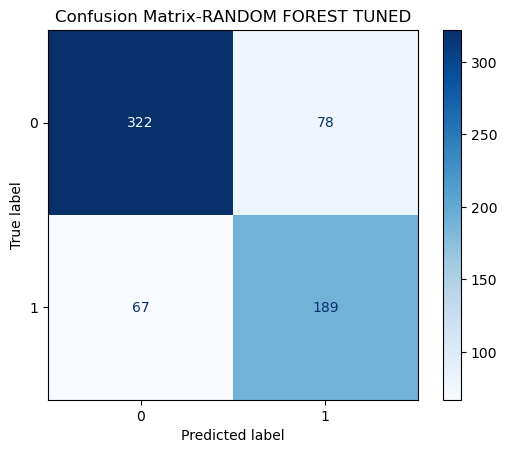

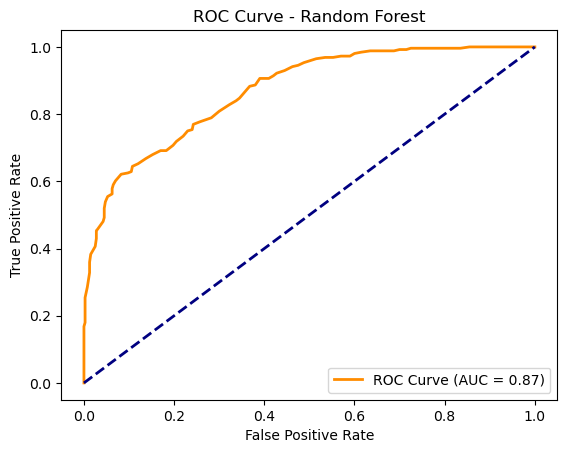

In [129]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create RandomForest model
rf = RandomForestClassifier(random_state=42)

# Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_smote, y_train_smote)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Train best model
best_rf = grid_search.best_estimator_
best_rf.fit(X_train_smote, y_train_smote)

# Predict on test set
y_pred = best_rf.predict(X_test_scaled)

# Get probabilities
y_proba_rf = best_rf.predict_proba(X_test_scaled)[:, 1]

# Predict using best_rf_model
y_pred_rf = best_rf.predict(X_test_scaled)
y_proba_rf = best_rf.predict_proba(X_test_scaled)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_pred_proba))

y_pred_rf = best_rf.predict(X_test_scaled)
print(classification_report(y_test, y_pred_rf))

# ROC AUC Score
y_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]
auc_rf = roc_auc_score(y_test, y_proba_rf)
print("ROC AUC Score:", auc_rf)

# ROC Curve and AUC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_proba_rf)
roc_auc_rf = metrics.auc(fpr_rf, tpr_rf)

cm = confusion_matrix(y_test, y_pred)
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix-RANDOM FOREST TUNED")
plt.show()

plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

***FEATURE IMPORTANCE***

           Feature  Importance
4          Sulfate    0.277921
0               ph    0.188821
3      Chloramines    0.088592
2           Solids    0.084672
1         Hardness    0.083228
8        Turbidity    0.071419
7  Trihalomethanes    0.070666
5     Conductivity    0.068414
6   Organic_carbon    0.066267


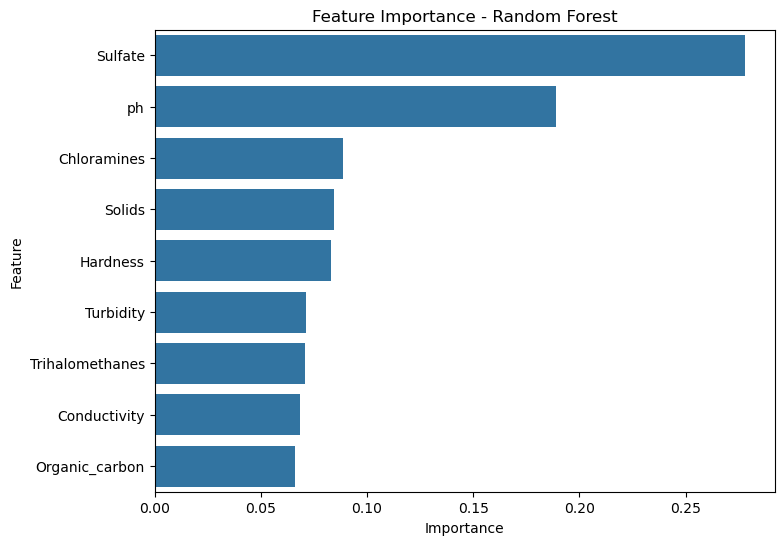

In [98]:
# Get feature importances
importances = best_rf.feature_importances_

# Get feature names
feature_names = X.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)
plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance - Random Forest')
plt.show()

***XGBoost***

In [101]:
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

Accuracy: 0.7774390243902439
ROC AUC Score: 0.874482421875
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.82       400
           1       0.71      0.72      0.72       256

    accuracy                           0.78       656
   macro avg       0.77      0.77      0.77       656
weighted avg       0.78      0.78      0.78       656



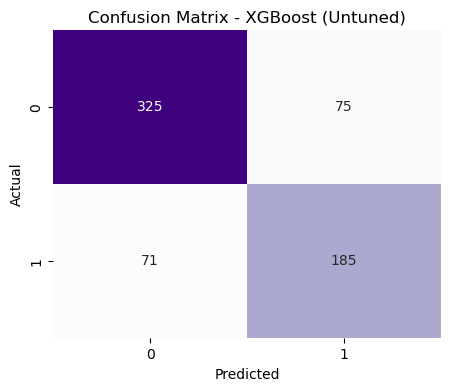

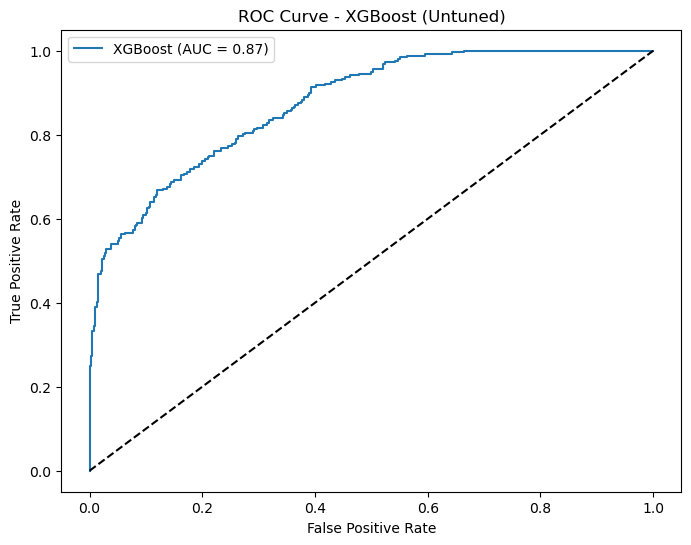

In [103]:
# Predict
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_proba_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Metrics
acc_xgb = accuracy_score(y_test, y_pred_xgb)
roc_xgb = roc_auc_score(y_test, y_proba_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Output
print("Accuracy:", acc_xgb)
print("ROC AUC Score:", roc_xgb)
print("Classification Report:\n", report_xgb)

plt.figure(figsize=(5,4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title('Confusion Matrix - XGBoost (Untuned)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)

plt.figure(figsize=(8,6))
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {roc_xgb:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost (Untuned)")
plt.legend()
plt.show()


***XGBoost with GridsearchCV***

In [106]:
# Define base model
xgb_clf = XGBClassifier( eval_metric='logloss', random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1]
}

# Run GridSearchCV
grid_search = GridSearchCV(estimator=xgb_clf,
                           param_grid=param_grid,
                           scoring='f1',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

# Fit to training data
grid_search.fit(X_train_smote, y_train_smote)

# Save best model
xgb_model = grid_search.best_estimator_

# Optional: Print best params and F1 score
print("Best parameters:", grid_search.best_params_)
print("Best F1 score from CV:", grid_search.best_score_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best F1 score from CV: 0.7997539533820781


Accuracy: 0.7728658536585366
ROC AUC Score: 0.8676953125
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.81       400
           1       0.70      0.72      0.71       256

    accuracy                           0.77       656
   macro avg       0.76      0.76      0.76       656
weighted avg       0.77      0.77      0.77       656



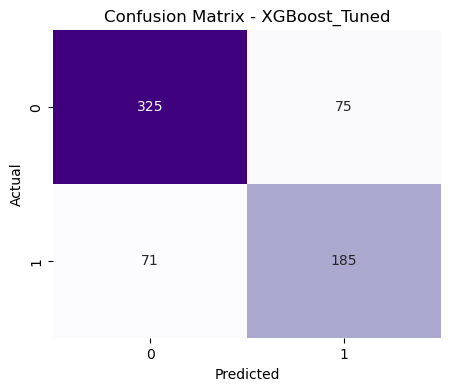

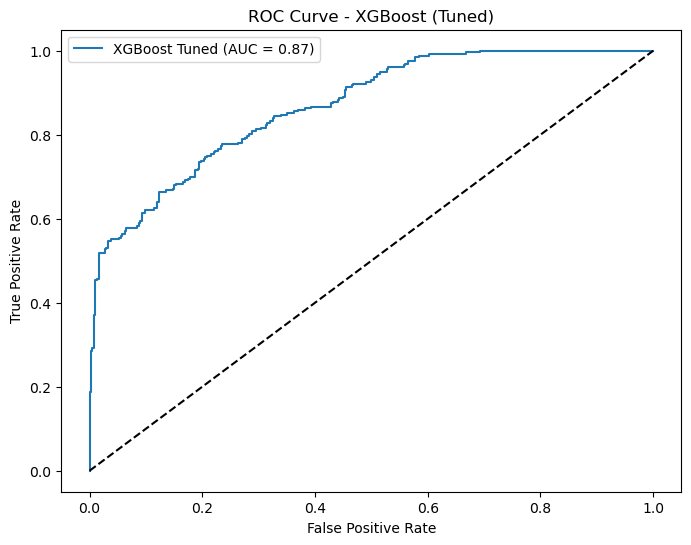

In [107]:
#predict
y_pred_xgb_tuned = xgb_model.predict(X_test_scaled)
y_proba_xgb_tuned = xgb_model.predict_proba(X_test_scaled)[:, 1]

#Accuracy
acc_xgb_tuned = accuracy_score(y_test, y_pred_xgb_tuned)
roc_xgb_tuned = roc_auc_score(y_test, y_proba_xgb_tuned)
report_xgb_tuned = classification_report(y_test, y_pred_xgb_tuned)
cm_xgb_tuned = confusion_matrix(y_test, y_pred_xgb_tuned)

#Evaluation
print("Accuracy:", acc_xgb_tuned)
print("ROC AUC Score:", roc_xgb_tuned)
print("Classification Report:\n", report_xgb_tuned)

#Heat_Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title('Confusion Matrix - XGBoost_Tuned')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#Roc_AUC Score
fpr, tpr, _ = roc_curve(y_test, y_proba_xgb_tuned)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"XGBoost Tuned (AUC = {roc_xgb_tuned:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost (Tuned)")
plt.legend()
plt.show()

***K Nearest Neighbors***

In [111]:
# Create KNN model with default or your chosen parameters
knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='minkowski')

# Train on SMOTE-processed training data
knn_model.fit(X_train_smote, y_train_smote)


KNeighborsClassifier()

Accuracy: 0.5762195121951219

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.64      0.65       400
           1       0.46      0.48      0.47       256

    accuracy                           0.58       656
   macro avg       0.56      0.56      0.56       656
weighted avg       0.58      0.58      0.58       656

AUC Score: 0.6071240234374999


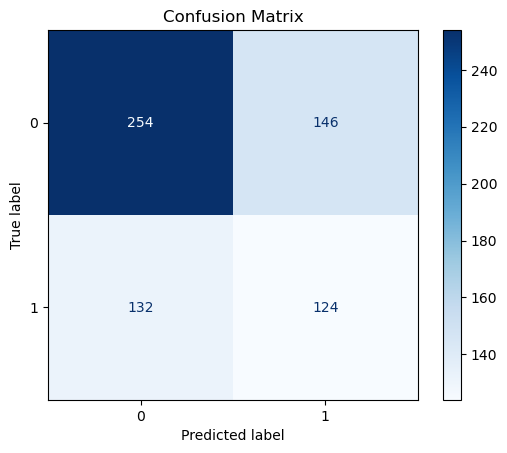

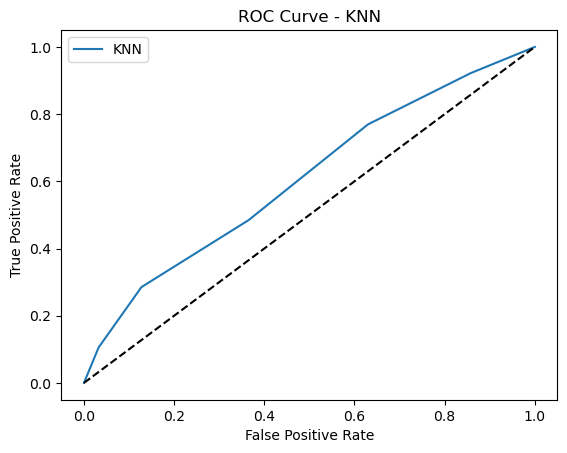

In [113]:
#Predict
y_pred = knn_model.predict(X_test_scaled)
y_pred_proba = knn_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_pred_proba))
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="KNN")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN")
plt.legend()
plt.show()

***KNN with gridsearchCV***

In [116]:
param_grid_knn = {
    'n_neighbors': list(range(3, 21, 2)),  # Odd neighbors from 3 to 19
    'weights': ['uniform', 'distance'],    # Weight points by distance or not
    'metric': ['euclidean', 'manhattan']  # Distance metrics to try
}

knn = KNeighborsClassifier()

grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)

grid_knn.fit(X_train_scaled, y_train)

print("Best KNN parameters:", grid_knn.best_params_)

best_knn = grid_knn.best_estimator_


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best KNN parameters: {'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'distance'}


Accuracy: 0.5762195121951219
AUC Score: 0.6071240234374999
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.64      0.65       400
           1       0.46      0.48      0.47       256

    accuracy                           0.58       656
   macro avg       0.56      0.56      0.56       656
weighted avg       0.58      0.58      0.58       656



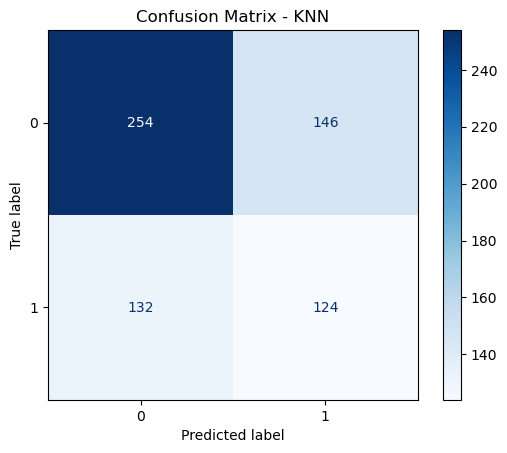

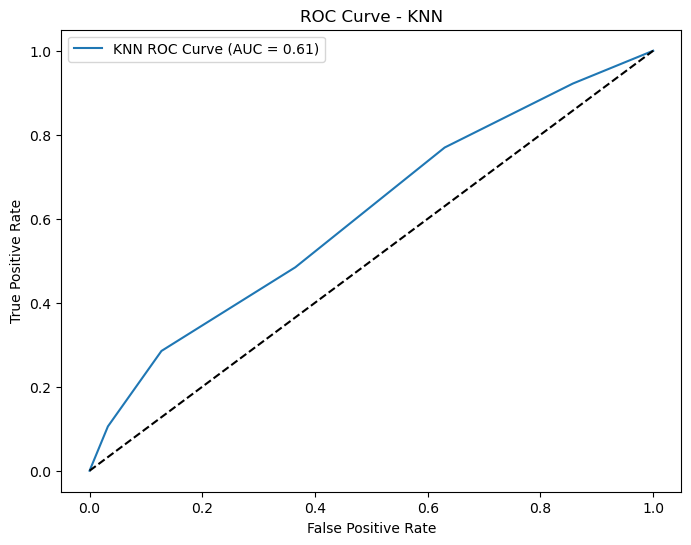

In [118]:
# Predict
y_pred_knn = knn_model.predict(X_test_scaled)
y_proba_knn = knn_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, roc_curve, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

# AUC Score
print("AUC Score:", roc_auc_score(y_test, y_proba_knn))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - KNN")
plt.show()

# ROC Curve
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
roc_auc_knn = roc_auc_score(y_test, y_proba_knn)

plt.figure(figsize=(8,6))
plt.plot(fpr_knn, tpr_knn, label=f'KNN ROC Curve (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend()
plt.show()

***Comparison***

In [121]:
comparison_df = pd.DataFrame([
    {"Model": "XGBoost", "Accuracy Score": 0.7728},
    {"Model": "Random Forest", "Accuracy Score":0.7789},
    {"Model": "SVC", "Accuracy Score": 0.6035},
    {"Model": "KNN", "Accuracy Score":0.5762},
    {"Model": "Decision Tree", "Accuracy Score": 0.73170}
])

# Sort for display
comparison_df = comparison_df.sort_values(by="Accuracy Score", ascending=False).reset_index(drop=True)
comparison_df


,Model,Accuracy Score
0,Random Forest,0.7789
1,XGBoost,0.7728
2,Decision Tree,0.7317
3,SVC,0.6035
4,KNN,0.5762


***Model Accuracy Comparison***

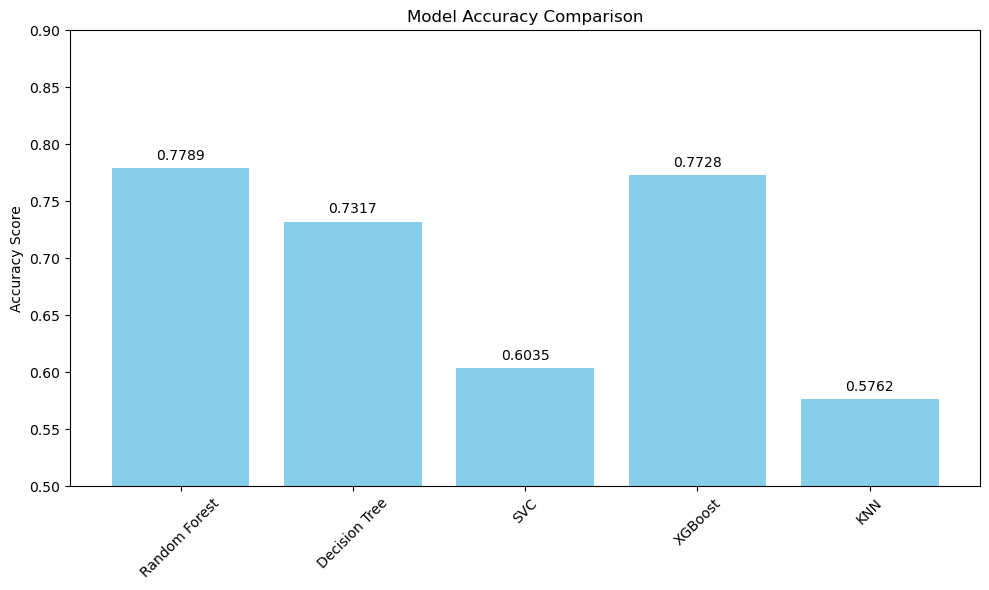

In [124]:
# Data
models = ['Random Forest', 'Decision Tree', 'SVC', 'XGBoost', 'KNN']
accuracy_scores = [0.7789, 0.7317, 0.6035, 0.7728, 0.5762]

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracy_scores, color='skyblue')
plt.ylim(0.5, 0.9)
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy Comparison")

# Add data labels
for bar, score in zip(bars, accuracy_scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f"{score:.4f}", ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


*****Several classification models were trained:
            SVM, Decision Tree, Random Forest, XGBoost, KNN*****
            
***After hyperparameter tuning, Random Foresr achieved the best performance with:***
    ***Accuracy: 0.77%***
    ****AUC Score: 0.87****

****The project demonstrates how proper preprocessing and model selection can effectively predict water potability.****

******Conclusion: Among the evaluated models, Random Forest achieved the highest accuracy score (0.7789), indicating better overall performance on this dataset compared to Decision Tree, SVC, XGBoost, and KNN.******

